# Homework 5 - Assignment 3

### Response authored by: JKtours (jlk635)

In [1]:
#Usual packages for import including spicy_stats and seaborn

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats
import seaborn as sns
import statsmodels.api as sm


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Data read-in

In [2]:

dfFirearm = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/World_firearms_murders_and_ownership.csv', header = 0)
dfMassShooting = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/data-pvLFI.csv', header = 0)
dfPopulation = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows = 4, header = 0)
dfGDP = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows = 4, header = 0)


In [3]:
dfMassShooting['Country'][2] = 'Belgium'
dfMassShooting['Country'][9] = 'Netherlands'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Data munging - replace column names and drop columns not needed

In [4]:
df_ = dfPopulation[['Country Name', '2016']]
df_.rename(columns={'2016': 'pop'}, inplace=True)
dfGDP_ = dfGDP[['Country Name', '2016']]
dfGDP_.rename(columns={'2016': 'gdp'}, inplace=True)
dfFirearm_ = dfFirearm[['Country/Territory', 'Number of homicides by firearm','Average total all civilian firearms']]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


### Data munging - merge datasets on Country (key), only countries

In [5]:
df_ = df_.merge(dfGDP_, on='Country Name')
df_ = df_.merge(dfFirearm_, left_on='Country Name', right_on='Country/Territory')
df_ = df_.drop(['Country/Territory'], axis=1)
df_ = df_.merge(dfMassShooting, left_on='Country Name', right_on='Country')




In [6]:
df_.head()



,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,24127159.0,1.204616e+12,30.0,3050000.0,Australia,15.0,4
1,Austria,8747358.0,3.864278e+11,18.0,2500000.0,Austria,30.4,1
2,Belgium,11348159.0,4.663657e+11,70.0,1800000.0,Belgium,17.2,2
3,Canada,36286425.0,1.529760e+12,173.0,9950000.0,Canada,30.8,4
4,Switzerland,8372098.0,6.598272e+11,57.0,3400000.0,Switzerland,45.7,2


**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# Exploration

## Plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Using Poisson statistics for the errorbars on the number of mass shootings 


Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


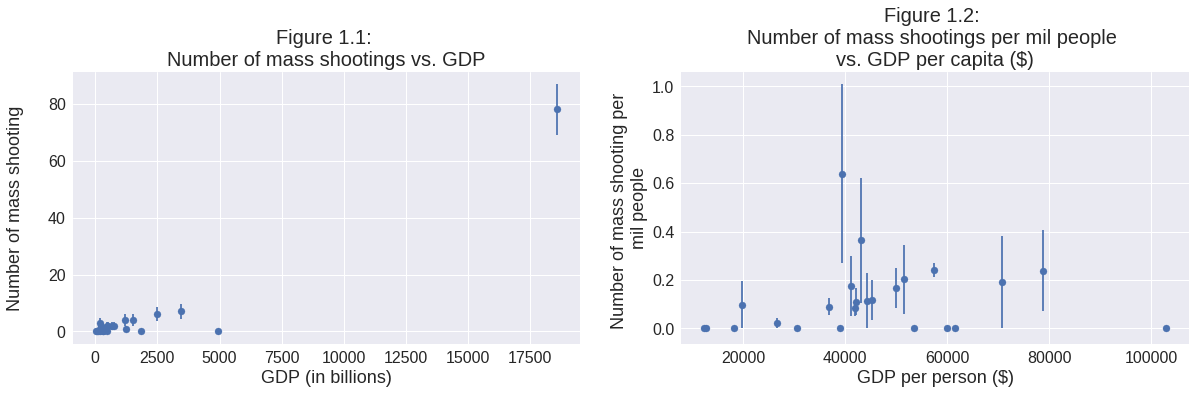

Number of mass shooting per mil people vs GDP per person, errors represent Poisson statistics.



In [7]:
fig = pl.figure(figsize=(20,5)) 
ax = fig.add_subplot(121)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 1.1: \nNumber of mass shootings vs. GDP", fontsize=20)
ax.set_xlabel("GDP (in billions)", fontsize=18)
ax.set_ylabel("Number of mass shooting\n", fontsize=18)
ax.set_ylim()

print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## NEED SHOOTINGS PER PERSON

df_['shootingspp'] = df_["Number of mass shootings"] / (df_['pop'] / 1e6)
df_['gpdpp'] = df_['gdp'] / df_['pop']


ax = fig.add_subplot(122)

scatter = ax.scatter(df_['gpdpp'], df_['shootingspp'])
ax.errorbar(df_['gpdpp'], df_['shootingspp'], 
            yerr = np.sqrt(df_['Number of mass shootings'])/ (df_['pop'] / 1e6), fmt = '.')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 1.2: \nNumber of mass shootings per mil people \nvs. GDP per capita ($)", fontsize=20)
ax.set_xlabel("GDP per person ($)", fontsize=18)
ax.set_ylabel("Number of mass shooting per \nmil people", fontsize=18)
ax.set_ylim()
pl.show()
print ("Number of mass shooting per mil people vs GDP per person, " + 
       "errors represent Poisson statistics.\n" )


## Plot of average number of civilian fire arms per person (by country)



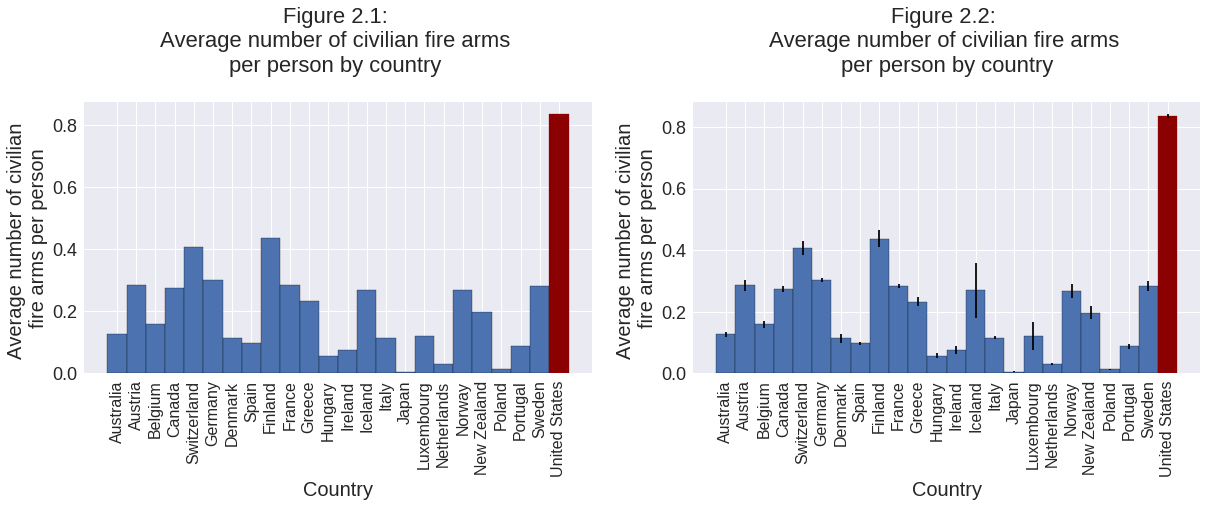

In [8]:
#without error bars

df_['Average number of civilian fire arms per person'] = df_['Average total all civilian firearms'] / df_['pop']


labels, values = df_['Country Name'], df_['Average number of civilian fire arms per person']

indexes = np.arange(len(labels))
width = 1

fig = pl.figure(figsize=(20,5)) 
ax = fig.add_subplot(121)
 
pl.tick_params(axis='both',labelsize=18)
firearmschart = pl.bar(indexes, values, width, edgecolor='black' )
firearmschart[-1].set_color('darkred')
pl.xticks(indexes, labels, rotation=90 , fontsize = 16) #indexes + width * 0.5
pl.title("Figure 2.1: \nAverage number of civilian fire arms \nper person by country \n", fontsize = 22)
pl.xlabel("Country", fontsize = 20)
pl.ylabel("Average number of civilian \nfire arms per person", fontsize = 20)

## WITH ERROR BARS

labels, values, errbar  = df_['Country Name'], df_['Average number of civilian fire arms per person'], np.sqrt(df_['Average total all civilian firearms']) / df_['pop']   * 1e2 

## ERROR BARS SCALED BY FACTOR OF 100

indexes = np.arange(len(labels))
width = 1

ax = fig.add_subplot(122) 
pl.tick_params(axis='both',labelsize=18)
firearmschart = pl.bar(indexes, values, width, yerr = errbar, edgecolor='black' )
firearmschart[-1].set_color('darkred')
pl.xticks(indexes, labels, rotation=90 , fontsize = 16) #indexes + width * 0.5
pl.title("Figure 2.2: \nAverage number of civilian fire arms \nper person by country\n", fontsize = 22)
pl.xlabel("Country", fontsize = 20)
pl.ylabel("Average number of civilian \nfire arms per person", fontsize = 20)
pl.show()



The United States has the highest number of avergae civilian firearms per person

In [9]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

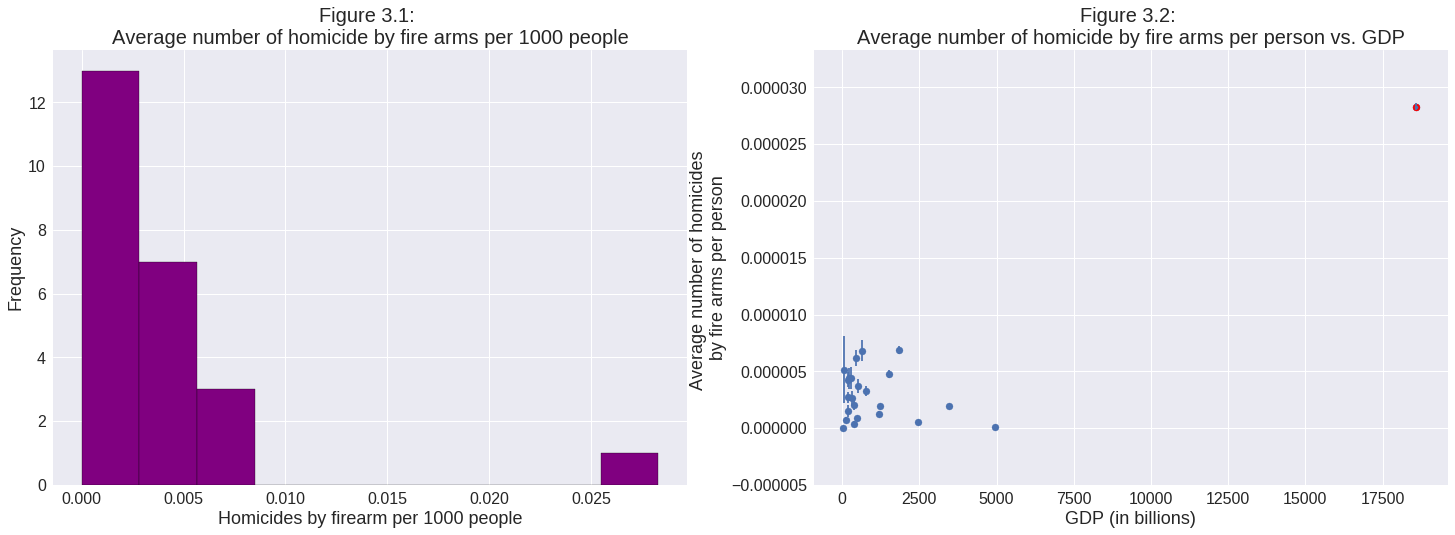

In [10]:
fig = pl.figure(figsize=(25,8)) 
ax = fig.add_subplot(121)

ax.tick_params(axis='both',labelsize=16)
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000, color='purple', edgecolor='black')
ax.set_xlabel('Homicides by firearm per 1000 people', fontsize=18);
ax.set_ylabel("Frequency", fontsize=18)
pl.title("Figure 3.1: \nAverage number of homicide by fire arms per 1000 people", fontsize=20);



df_['Average number of homicides by fire arms per person'] = df_['Number of homicides by firearm'] / df_['pop']


ax = fig.add_subplot(122)

scatter = ax.scatter(df_.gdp / 1e9, df_['Average number of homicides by fire arms per person'])
scatter2 = ax.scatter(df_.gdp.max() / 1e9, df_['Average number of homicides by fire arms per person'].max(),color='red')
ax.errorbar(df_.gdp / 1e9, df_['Average number of homicides by fire arms per person'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0) / df_['pop'], fmt = '.')
#ax.errorbar(df_.gdp.max() / 1e9, df_['Average number of homicides by fire arms per person'].max(), 
#           yerr = (np.sqrt(df_['Number of homicides by firearm'] * 1.0) / df_['pop']), color='r', fmt = '.')
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("GDP (in billions)", fontsize=18)
ax.set_ylabel("Average number of homicides \nby fire arms per person", fontsize=18)
ax.set_ylim(-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
pl.title("Figure 3.2: \nAverage number of homicide by fire arms per person vs. GDP", fontsize=20);
pl.show();
pl.tight_layout;

Again the United States has the highest average number of homicides and firearms per person (and highest GDP)

## Plot of the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color



Average number of homicides by fire arms ('000s) vs Total civilian firearms ('000s), 
errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the 
highest number of homicides by firearm and the most civilian firearms


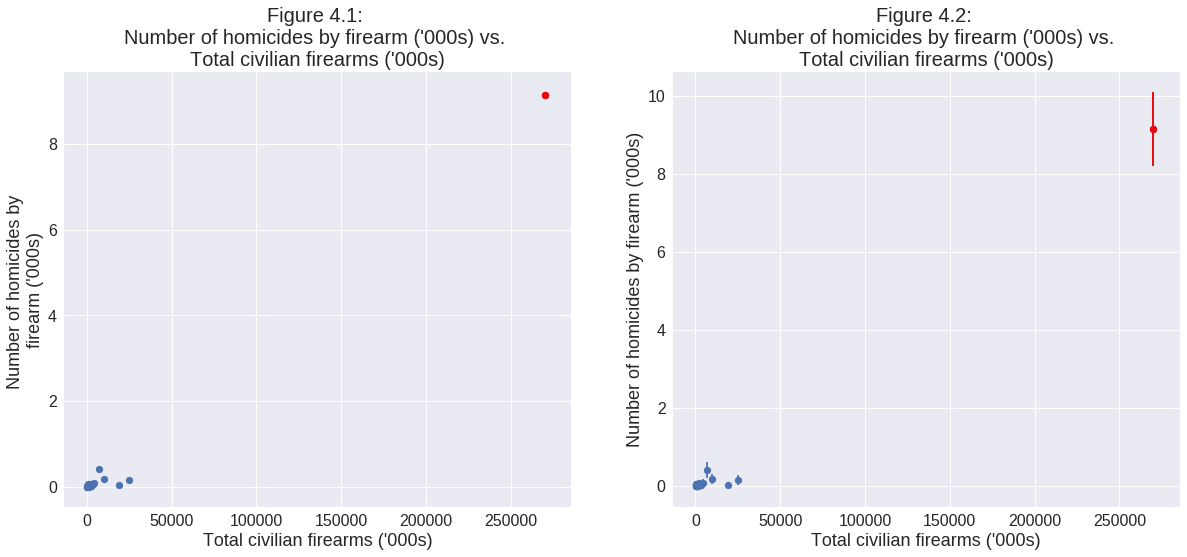

In [11]:

fig = pl.figure(figsize=(20,8)) 
ax = fig.add_subplot(121)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of homicides by firearm'] / 1e3)
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of homicides by firearm'].max() / 1e3,color='red')
#ax.errorbar(df_['Number of homicides by firearm'] / 1e3, df_['Average total all civilian firearms'] / 1e3, 
#            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0) , fmt = '.')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 4.1: \nNumber of homicides by firearm ('000s) vs. \nTotal civilian firearms ('000s)", fontsize=20);
ax.set_ylabel("Number of homicides by \nfirearm ('000s)", fontsize=18)
ax.set_xlabel("Total civilian firearms ('000s)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)




ax = fig.add_subplot(122)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of homicides by firearm'] / 1e3)
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of homicides by firearm'].max() / 1e3,color='red')
ax.errorbar(df_['Average total all civilian firearms'] / 1e3, df_['Number of homicides by firearm'] / 1e3,  
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0)/ 1e2 , fmt = '.')
errbarUS =  ax.errorbar(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of homicides by firearm'].max() / 1e3, 
           yerr = np.sqrt(df_['Number of homicides by firearm'].max() * 1.0)/ 1e2 , fmt = '.',color='red')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 4.2: \nNumber of homicides by firearm ('000s) vs. \nTotal civilian firearms ('000s)", fontsize=20);
ax.set_ylabel("Number of homicides by firearm ('000s)", fontsize=18)
ax.set_xlabel("Total civilian firearms ('000s)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)


print ("Average number of homicides by fire arms ('000s) vs Total civilian firearms ('000s), \n" + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the \nhighest number of homicides by firearm and the most civilian firearms")

## Plot of the number of  mass shootings against the number of civilian firearms. The  US in a different color



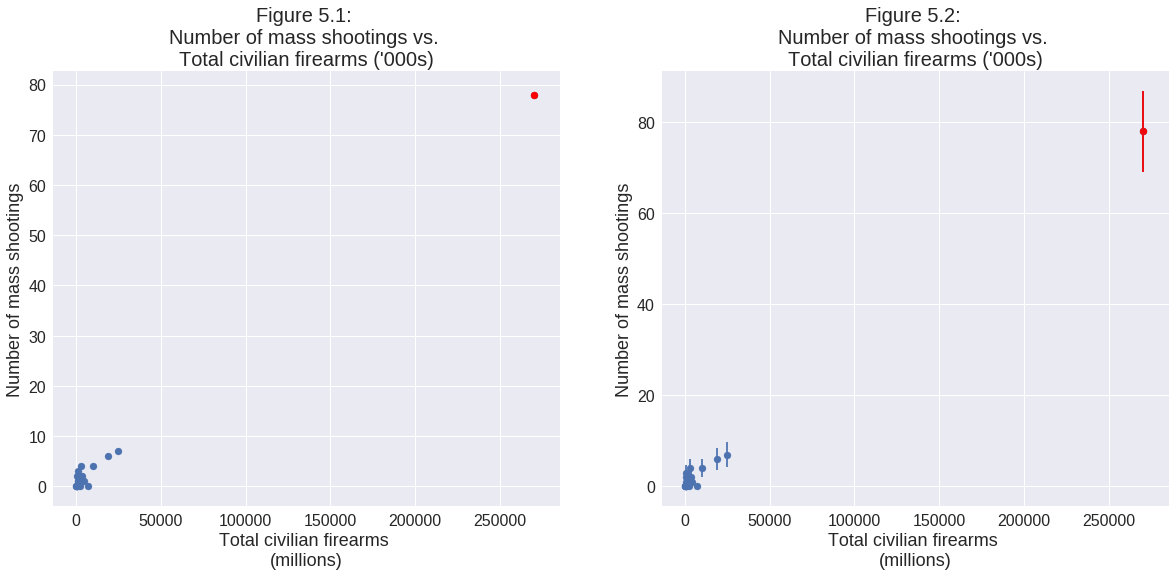

Average number of mass shootings vs Total civilian firearms ('000s), 
errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of mass shootings 
and the most civilian firearms


In [12]:
#FLIPPED

fig = pl.figure(figsize=(20,8))  
ax = fig.add_subplot(121)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of mass shootings'])
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of mass shootings'].max(), color='red')
#ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms'] / 1e3, 
#            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0 ) , fmt = '.')
#errbarUS =  ax.errorbar(df_['Number of mass shootings'].max(), df_['Average total all civilian firearms'].max() / 1e3, 
#            yerr = np.sqrt(df_['Average total all civilian firearms'].max() * 1.0) , fmt = '.',color='red')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 5.1: \nNumber of mass shootings vs. \nTotal civilian firearms ('000s)", fontsize=20);
ax.set_ylabel("Number of mass shootings", fontsize=18)
ax.set_xlabel("Total civilian firearms \n(millions)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)



ax = fig.add_subplot(122)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of mass shootings'])
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of mass shootings'].max(), color='red')
ax.errorbar(df_['Average total all civilian firearms'] / 1e3, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0 ) , fmt = '.')
errbarUS =  ax.errorbar(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of mass shootings'].max(), 
            yerr = np.sqrt(df_['Number of mass shootings'].max() * 1.0) , fmt = '.',color='red')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 5.2: \nNumber of mass shootings vs. \nTotal civilian firearms ('000s)", fontsize=20);
ax.set_ylabel("Number of mass shootings", fontsize=18)
ax.set_xlabel("Total civilian firearms \n(millions)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
pl.show()


print ("Average number of mass shootings vs Total civilian firearms ('000s), \n" + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of mass shootings \nand the most civilian firearms")

# Modeling

## Line fit to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 

In [13]:
regressDf = df_['Country Name']
regressDf['Number of mass shootings'] = df_['Number of mass shootings']
regressDf['pop'] = df_['pop']
regressDf['Number of mass shootings per person'] = df_['shootingspp']
regressDf['Average number of civilian fire arms per person'] = df_['Average number of civilian fire arms per person']


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
regressDf['shootingspmil'] = df_["Number of mass shootings"] / df_['pop'] * 1e6

In [15]:
y = regressDf['shootingspmil']
x = regressDf['Average number of civilian fire arms per person']
x = sm.add_constant(x)

olsLM = sm.OLS(y, x).fit()

olsLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.006
Date:                Wed, 18 Oct 2017   Prob (F-statistic):             0.0357
Time:                        23:36:26   Log-Likelihood:                 14.454
No. Observations:                  24   AIC:                            -24.91
Df Residuals:                      22   BIC:                            -22.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------
const                                               0.0426      0.044      0.962      0.346        -0.049     0.134
Average number of civilian fire arms per person     0.3609      0.161      2.237      0.036         0.026     0.695
==============================================================================
Omnibus:                       33.356   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           2.544   Prob(JB):                     9.16e-19
Kurtosis:                      10.561   Cond. No.                         5.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
y = regressDf['shootingspmil']
x = regressDf['Average number of civilian fire arms per person']
x = sm.add_constant(x)

shootingError = np.sqrt(regressDf['Number of mass shootings'])/(regressDf['pop']/1e5)
wlsWeight = 1 / shootingError
wlsWeightMin = wlsWeight.min()
for i in range(len(wlsWeight)):
    if shootingError[i] == 0:
        wlsWeight[i] = wlsWeightMin
        

wlsLM = sm.WLS(y, x, weights=wlsWeight).fit()

wlsLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            WLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.52
Date:                Wed, 18 Oct 2017   Prob (F-statistic):            0.00185
Time:                        23:36:26   Log-Likelihood:                 20.785
No. Observations:                  24   AIC:                            -37.57
Df Residuals:                      22   BIC:                            -35.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------
const                                               0.0477      0.026      1.822      0.082        -0.007     0.102
Average number of civilian fire arms per person     0.2460      0.070      3.538      0.002         0.102     0.390
==============================================================================
Omnibus:                       14.947   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.272
Skew:                           1.471   Prob(JB):                     0.000483
Kurtosis:                       5.572   Cond. No.                         4.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

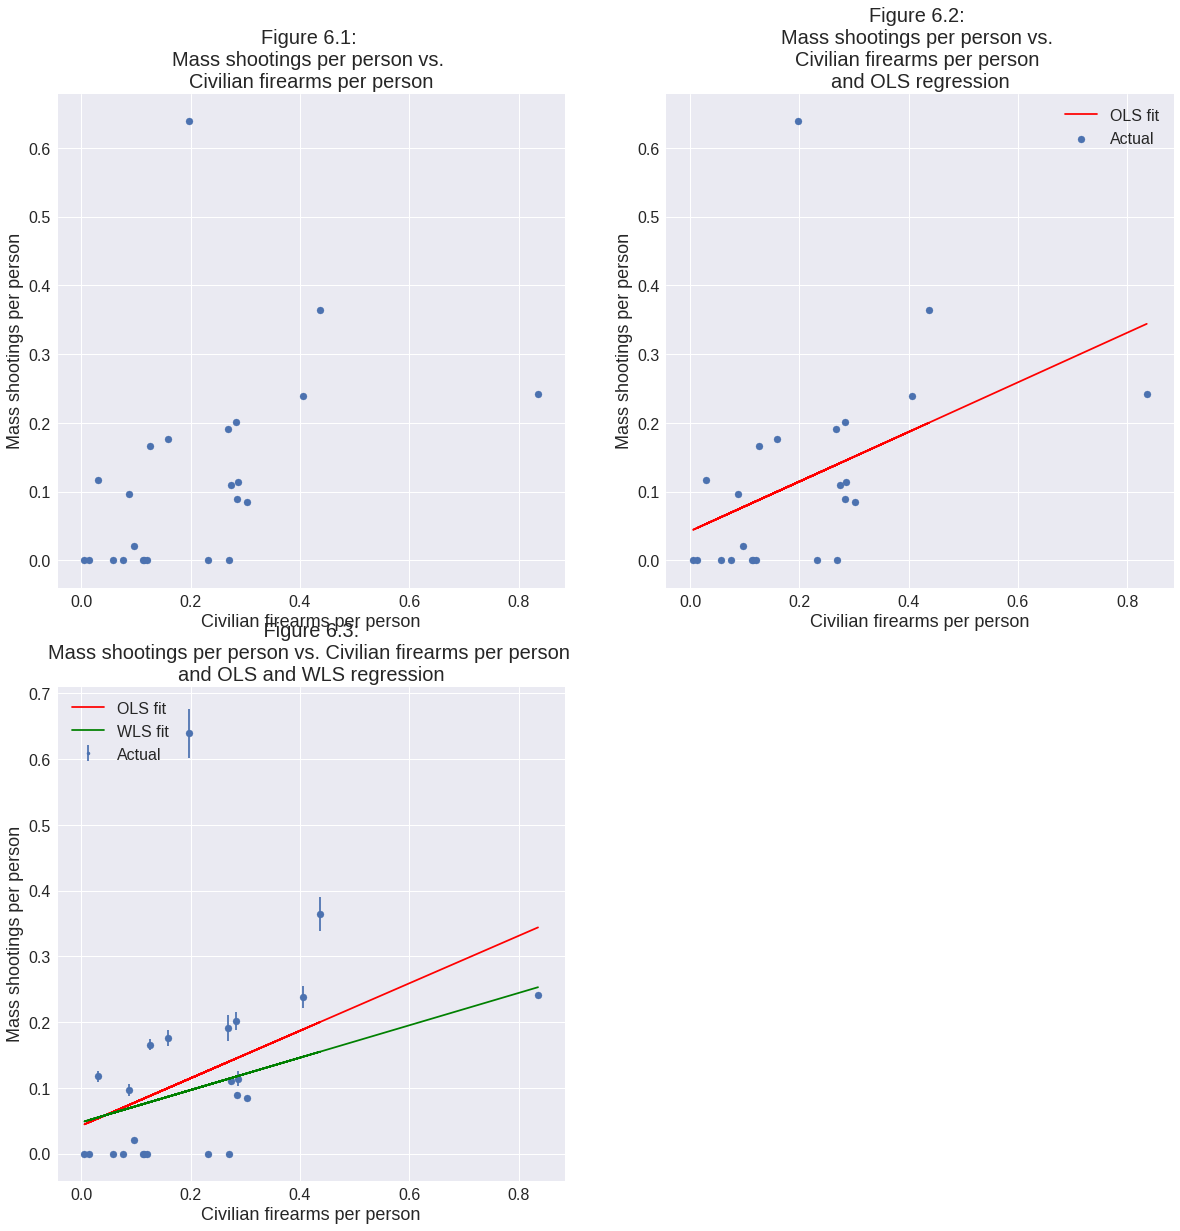

In [17]:

fig = pl.figure(figsize=(20,20)) 
ax = fig.add_subplot(221)
scatter = ax.scatter(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'])
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 6.1: \nMass shootings per person vs. \nCivilian firearms per person", fontsize=20);
ax.set_xlabel("Civilian firearms per person", fontsize=18)
ax.set_ylabel("Mass shootings per person", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)


ax = fig.add_subplot(222)
scatter = ax.scatter(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'],label='Actual')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 6.2: \nMass shootings per person vs. \nCivilian firearms per person \nand OLS regression", fontsize=20);
ax.set_xlabel("Civilian firearms per person", fontsize=18)
ax.set_ylabel("Mass shootings per person", fontsize=18)
#ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
#ax.set_xlim()#0,500)
ax.plot(regressDf['Average number of civilian fire arms per person'],olsLM.fittedvalues,'-', c='red', label = 'OLS fit');
ax.legend(fontsize=16)

ax = fig.add_subplot(223)
scatter = ax.scatter(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'],label=None)
ax.errorbar(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'], 
            yerr = shootingError * 1.0 , fmt = '.',label='Actual')
ax.tick_params(axis='both',labelsize=16)
pl.title("\n \n Figure 6.3: \nMass shootings per person vs. Civilian firearms per person \nand OLS and WLS regression", fontsize=20);
ax.set_xlabel("Civilian firearms per person", fontsize=18)
ax.set_ylabel("Mass shootings per person", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
ax.plot(regressDf['Average number of civilian fire arms per person'],olsLM.fittedvalues,'-', c='red', label = 'OLS fit');
ax.plot(regressDf['Average number of civilian fire arms per person'],wlsLM.fittedvalues,'-', c='green', label = 'WLS fit');
ax.legend(loc='upper left', fontsize=16)


#ax = fig.add_subplot(224)
#rpLm = sns.regplot(x="Average number of civilian fire arms per person", y="shootingspmil", data=regressDf, label='OLS fit with error bands')
#rpLm.tick_params(axis='both',labelsize=16)
#rpLm.set_xlabel("Civilian firearms per person", fontsize=18)
#rpLm.set_ylabel("Mass shootings per person", fontsize=18)
#rpLm.set_ylim(-0.15,0.9);
#rpLm.legend(loc='upper left', fontsize=16)


pl.show()
pl.tight_layout;

The OLS fit provides a sample line fit for Mass shootings per person vs. Civilian firearms per person. The WLS fit provides a flatter slope and less weighting to less accurate observations.